In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime

In [2]:
df = pd.read_csv("/Users/sanjith/Downloads/loan_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
threshold = len(df) / 2
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(cols_to_drop, axis=1)
print(f"Columns dropped: {cols_to_drop.tolist()}")

Columns dropped: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [4]:
df.shape

(307511, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [6]:
object_columns = df.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  EMERGENCYSTATE_MODE         161756 non-null  object
dtypes: object(13)
memory usage: 3

In [7]:
df['NAME_TYPE_SUITE'].replace('Other_B','not specified',inplace=True)
df['NAME_TYPE_SUITE'].replace('Other_A','not specified',inplace=True)
df['NAME_TYPE_SUITE'].replace('NaN','not specified',inplace=True)
df['NAME_TYPE_SUITE'].fillna('not specified', inplace=True)

income_to_occupation = {
    130790.895551: 'Cleaning staff',
    133228.001911: 'Low-skill Laborers',
    138396.508176: 'Cooking staff',
    144272.583828: 'Waiters/barmen staff',
    149662.695953: 'Security staff',
    149709.643434: 'Medicine staff',
    152302.874710: 'Sales staff',
    160541.662069: 'Secretaries',
    166357.482525: 'Laborers',
    172656.695254: 'Core staff',
    182334.812783: 'Private service staff',
    182842.045683: 'High skill tech staff',
    187011.606413: 'Drivers',
    188916.282416: 'HR staff',
    194578.357842: 'Accountants',
    195003.994674: 'Realty agents',
    213465.601711: 'IT staff',
    260336.681717: 'Managers'
}
income_occupation_df = pd.DataFrame(list(income_to_occupation.items()), columns=['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE'])
income_occupation_df = income_occupation_df.sort_values(by='AMT_INCOME_TOTAL')

def assign_occupation(income):
    for i in range(len(income_occupation_df)):
        if income <= income_occupation_df.iloc[i, 0]:
            return income_occupation_df.iloc[i, 1]
    return np.nan

df['OCCUPATION_TYPE'] = df.apply(
    lambda row: assign_occupation(row['AMT_INCOME_TOTAL']) if pd.isnull(row['OCCUPATION_TYPE']) else row['OCCUPATION_TYPE'],
    axis=1
)

/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/2530246421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].replace('Other_B','not specified',inplace=True)
/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/2530246421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [8]:
df['OCCUPATION_TYPE'].fillna("Senior Managers",inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/48732332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna("Senior Managers",inplace=True)
/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/48732332.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [9]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  int64  
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307499 non-null  float64
 6   AMT_GOODS_PRICE               307233 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  int64  
 9   DAYS_EMPLOYED                 307511 non-null  int64  
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  int64  
 12  FLAG_MOBIL                    307511 non-nul

In [10]:
df2 = df.copy()
num_col = df2.select_dtypes(include=['number'])

In [11]:
def find_outliers(df):
    outlier_columns = []
    for col in df.select_dtypes(include=['number']).columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        if any(df[col] < lower_bound) or any(df[col] > upper_bound):
            outlier_columns.append(col)
    
    return outlier_columns
columns_with_outliers = find_outliers(df)
columns_with_outliers

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 '

In [12]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(),inplace = True)

/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/1634520275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace = True)
/var/folders/7l/k_v47yjs7959fkc75b75m8680000gn/T/ipykernel_3060/1634520275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

<Axes: >

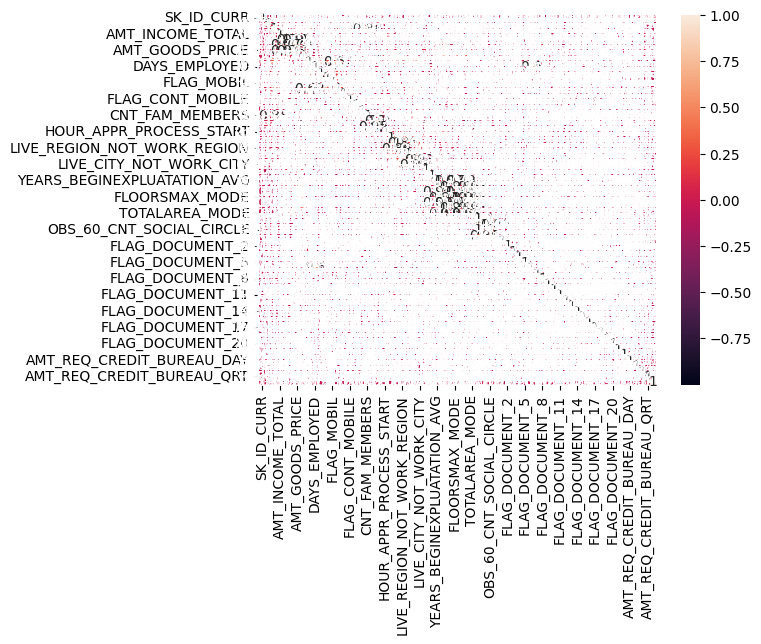

In [13]:
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns: 
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop("TARGET",axis = 1)
y = df['TARGET']

In [16]:
threshold = 0.85

highly_corr_vars = [(i, j) for i in correlation.columns for j in correlation.columns 
                    if i != j and abs(correlation.loc[i, j]) > threshold]

print("Highly Correlated Columns:")
for var_pair in highly_corr_vars:
    print(f"Columns '{var_pair[0]}' and '{var_pair[1]}' have a correlation of {correlation.loc[var_pair[0], var_pair[1]]:.2f}")

Highly Correlated Columns:
Columns 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' have a correlation of 0.88
Columns 'AMT_CREDIT' and 'AMT_GOODS_PRICE' have a correlation of 0.99
Columns 'AMT_GOODS_PRICE' and 'AMT_CREDIT' have a correlation of 0.99
Columns 'DAYS_EMPLOYED' and 'FLAG_EMP_PHONE' have a correlation of -1.00
Columns 'FLAG_EMP_PHONE' and 'DAYS_EMPLOYED' have a correlation of -1.00
Columns 'CNT_FAM_MEMBERS' and 'CNT_CHILDREN' have a correlation of 0.88
Columns 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' have a correlation of 0.95
Columns 'REGION_RATING_CLIENT_W_CITY' and 'REGION_RATING_CLIENT' have a correlation of 0.95
Columns 'REG_REGION_NOT_WORK_REGION' and 'LIVE_REGION_NOT_WORK_REGION' have a correlation of 0.86
Columns 'LIVE_REGION_NOT_WORK_REGION' and 'REG_REGION_NOT_WORK_REGION' have a correlation of 0.86
Columns 'YEARS_BEGINEXPLUATATION_AVG' and 'YEARS_BEGINEXPLUATATION_MODE' have a correlation of 0.97
Columns 'YEARS_BEGINEXPLUATATION_AVG' and 'YEARS_BEGINEXPLUATAT

<Axes: ylabel='TARGET'>

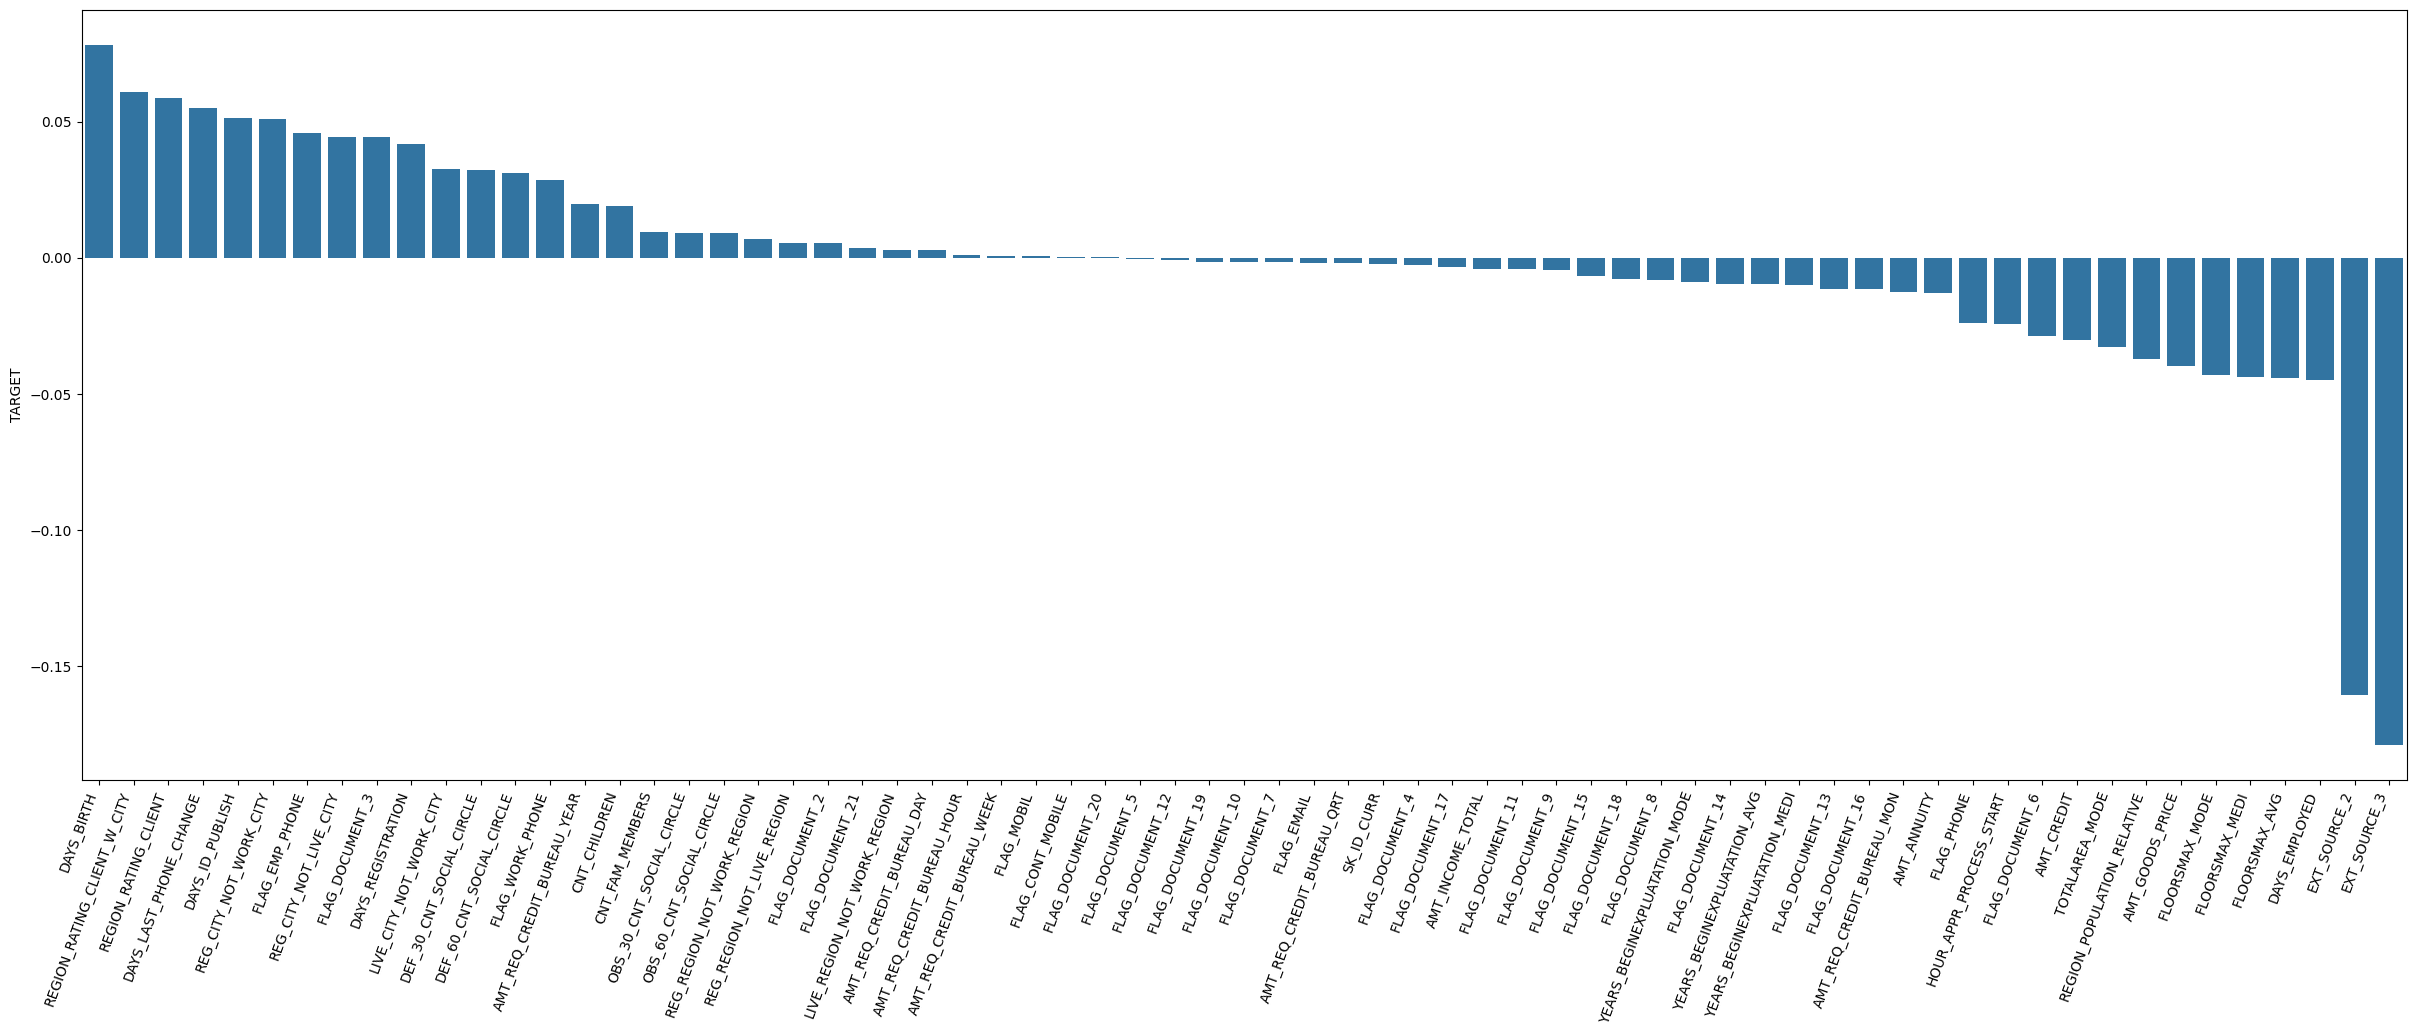

In [17]:
target_corr = correlation['TARGET']

target_corr = target_corr.drop(labels='TARGET')
sorted_target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(30,10))
plt.xticks(rotation=70, ha='right')
sns.barplot(sorted_target_corr)


In [18]:
sorted_target_corr = (target_corr.sort_values(ascending=True)).reset_index()
sorted_target_corr


,index,TARGET
0,EXT_SOURCE_3,-0.178919
1,EXT_SOURCE_2,-0.160472
2,DAYS_EMPLOYED,-0.044932
3,FLOORSMAX_AVG,-0.044003
4,FLOORSMAX_MEDI,-0.043768
...,...,...
62,DAYS_ID_PUBLISH,0.051457
63,DAYS_LAST_PHONE_CHANGE,0.055218
64,REGION_RATING_CLIENT,0.058899
65,REGION_RATING_CLIENT_W_CITY,0.060893


In [19]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

FLAG_MOBIL          0.079036
FLAG_CONT_MOBILE    0.059735
FLAG_DOCUMENT_3     0.055906
FLAG_EMP_PHONE      0.055194
FLAG_OWN_REALTY     0.054896
                      ...   
FLAG_DOCUMENT_18    0.000000
FLAG_DOCUMENT_17    0.000000
FLAG_DOCUMENT_14    0.000000
FLAG_DOCUMENT_13    0.000000
SK_ID_CURR          0.000000
Length: 80, dtype: float64

<Axes: >

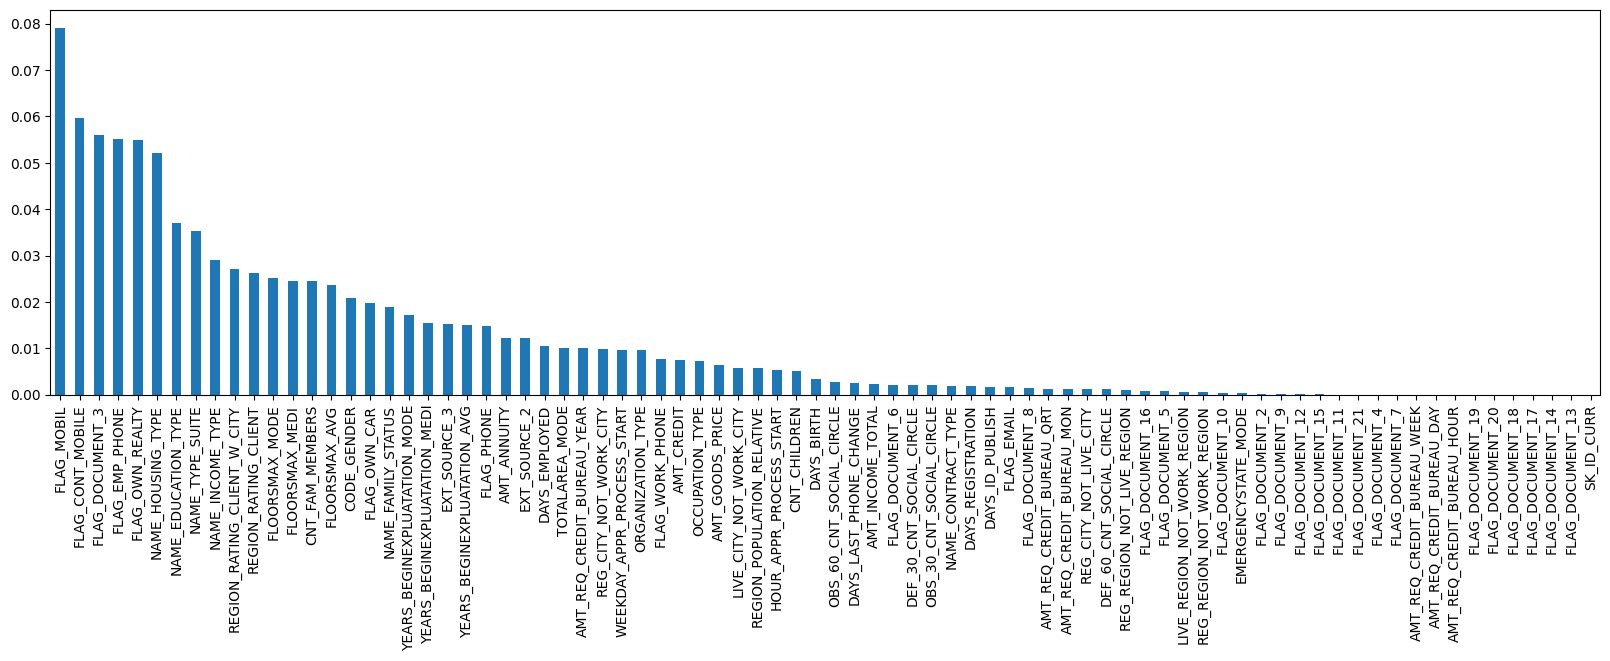

In [20]:
plt.figure(figsize=(20,5))
mutual_info.sort_values(ascending=False).plot.bar()

In [21]:
## Removing 1 of the highly correlated features using pearson correlation and the ones with the least entropy using Information gain
del df['SK_ID_CURR']
del df['CNT_FAM_MEMBERS']
del df['AMT_GOODS_PRICE']
del df['FLAG_EMP_PHONE']
del df['REGION_RATING_CLIENT']
del df['LIVE_REGION_NOT_WORK_REGION']
del df['YEARS_BEGINEXPLUATATION_AVG']
del df['FLOORSMAX_AVG']
del df['YEARS_BEGINEXPLUATATION_MODE']
del df['FLOORSMAX_MODE']
del df['OBS_30_CNT_SOCIAL_CIRCLE']
del df['DEF_60_CNT_SOCIAL_CIRCLE']
del df['AMT_REQ_CREDIT_BUREAU_HOUR']
del df['AMT_REQ_CREDIT_BUREAU_DAY']
del df['AMT_REQ_CREDIT_BUREAU_WEEK']
del df['AMT_REQ_CREDIT_BUREAU_MON']
del df['FLAG_MOBIL']
del df['FLAG_CONT_MOBILE']
del df['FLAG_DOCUMENT_20']
del df['FLAG_DOCUMENT_19']
del df['FLAG_DOCUMENT_10']
del df['FLAG_DOCUMENT_12']
del df['FLAG_DOCUMENT_5']
del df['FLAG_DOCUMENT_7']
del df['FLAG_DOCUMENT_21']
del df['FLAG_DOCUMENT_11']
del df['FLAG_DOCUMENT_14']
del df['FLAG_DOCUMENT_17']
del df['FLAG_DOCUMENT_16']

<Axes: >

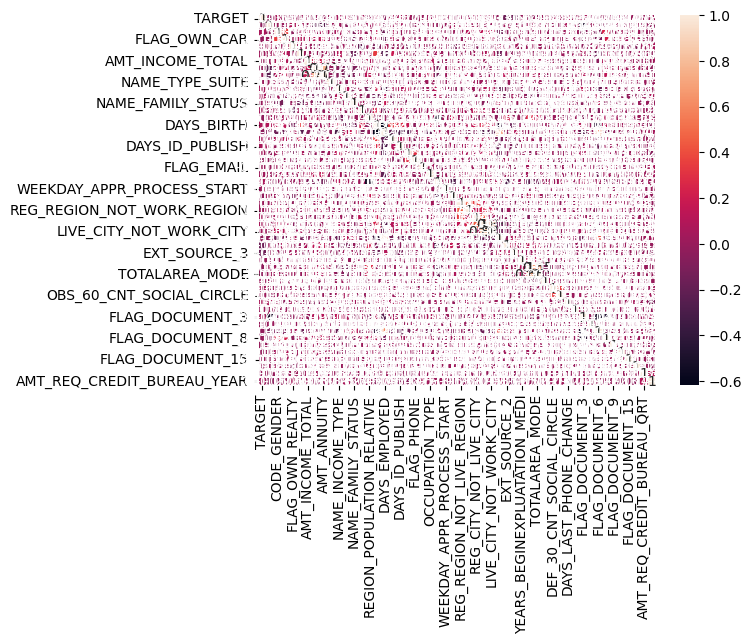

In [22]:
correlation2 = df.corr()
sns.heatmap(df.corr(),annot=True)

In [23]:
threshold = 0.75

highly_corr_vars = [(i, j) for i in correlation2.columns for j in correlation2.columns 
                    if i != j and abs(correlation2.loc[i, j]) > threshold]

print("Highly Correlated Columns:")
for var_pair in highly_corr_vars:
    print(f"Columns '{var_pair[0]}' and '{var_pair[1]}' have a correlation of {correlation2.loc[var_pair[0], var_pair[1]]:.2f}")

Highly Correlated Columns:
Columns 'AMT_CREDIT' and 'AMT_ANNUITY' have a correlation of 0.77
Columns 'AMT_ANNUITY' and 'AMT_CREDIT' have a correlation of 0.77
Columns 'REG_CITY_NOT_WORK_CITY' and 'LIVE_CITY_NOT_WORK_CITY' have a correlation of 0.83
Columns 'LIVE_CITY_NOT_WORK_CITY' and 'REG_CITY_NOT_WORK_CITY' have a correlation of 0.83


In [24]:
#Further removing additional features
del df['AMT_ANNUITY']
del df['LIVE_CITY_NOT_WORK_CITY']

In [25]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1023,stratify=y)
sampler = SMOTE(random_state=123,sampling_strategy=1)
X_resampled,y_resampled = sampler.fit_resample(X_train,y_train)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
re = RandomForestClassifier()
re.fit(X_resampled,y_resampled)
pred_re = re.predict(X_test)

classif_report = classification_report(y_test,pred_re)
print(classif_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.18      0.04      0.07      4965

    accuracy                           0.91     61503
   macro avg       0.55      0.51      0.51     61503
weighted avg       0.86      0.91      0.88     61503



<Axes: ylabel='TARGET'>

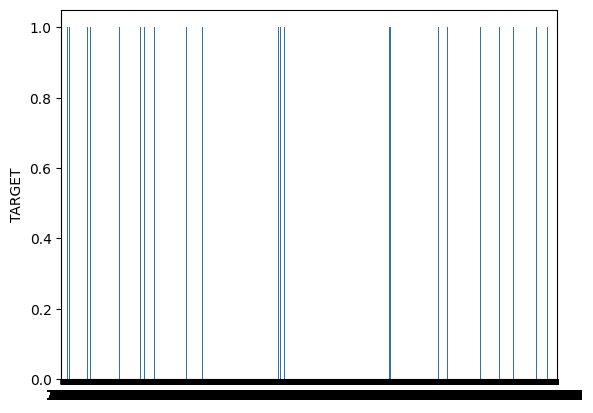

In [28]:
sns.barplot(y_test)

<Axes: >

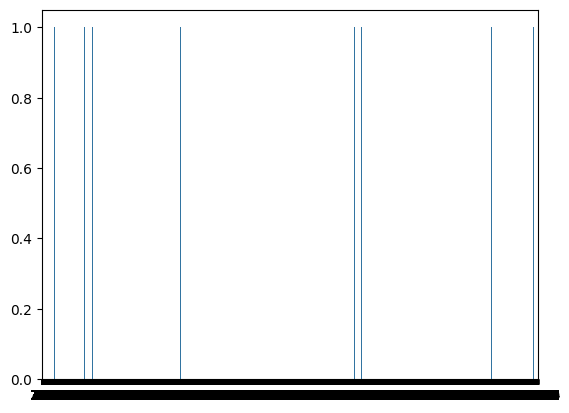

In [29]:
sns.barplot(pred_re)

In [30]:
df3 = pd.DataFrame()
df3['test'] = y_test
df3['Predicttion'] = pd.DataFrame(pred_re)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61503 entries, 54866 to 119595
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   test         61503 non-null  int64  
 1   Predicttion  12255 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.4 MB


In [31]:
import keras 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense

model = tf.keras.Sequential()

input_neurons = X_train.shape[1]
output_neurons = 1
hidden_layers = 5
neuron_hidden1 = 40
neuron_hidden2 = 20
neuron_hidden3 = 10
neuron_hidden4 = 5
neuron_hidden5 = 1

model.add(InputLayer(input_shape = (input_neurons,) ))
model.add(Dense(units=neuron_hidden1,activation='relu'))
model.add(Dense(units=neuron_hidden2,activation='relu'))
model.add(Dense(units=neuron_hidden3,activation='relu'))
model.add(Dense(units=neuron_hidden4,activation='relu'))
model.add(Dense(units=neuron_hidden5,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,093 (12.08 KB)

 Trainable params: 3,093 (12.08 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit( X_train,  y_train,  epochs=10, 
          
         batch_size=5000, 
         validation_data=(X_test, y_test)
)

Epoch 1/10
